# Image classificatin with CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import os

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## Data Preparation

In [2]:
main_folder = r"E:\image_data\data\\"
cnames = os.listdir(main_folder)
cnames

['dogs', 'horses', 'Humans']

In [3]:
x = []
y = []

for  folder in cnames:
    # get the list of all image names
    imglist = os.listdir(main_folder+folder)
    for imgname in imglist:
        img = image.load_img(main_folder+folder+"\\"+imgname,target_size=(100,100))
        img = image.img_to_array(img)
        x.append(img)
        y.append(cnames.index(folder))

In [4]:
x = np.array(x)
print(x.shape)
y = to_categorical(y)# onehot encoding the labels
print(y.shape)

(606, 100, 100, 3)
(606, 3)


## Modelling the CNN

In [5]:
from tensorflow.keras import models,layers

In [6]:
input_layer = layers.Input(shape=(100,100,3))

# first block
c1 = layers.Conv2D(filters=24,kernel_size=(3,3),activation='relu')(input_layer)
c2 = layers.Conv2D(filters=36,kernel_size=(3,3),activation='relu')(c1)
p1 = layers.MaxPooling2D()(c2)

# second block
c3 = layers.Conv2D(filters=48,kernel_size=(3,3),activation='relu')(p1)
c4 = layers.Conv2D(filters=60,kernel_size=(3,3),activation='relu')(c3)
dp = layers.Dropout(0.5)(c4)
p2 = layers.MaxPooling2D()(dp)

# flatten layer
ft = layers.Flatten()(p2)

dp = layers.Dropout(0.5)(ft)
# fist dense layer
h1 = layers.Dense(120,activation='relu')(dp)

#second dense layer
h2 = layers.Dense(40,activation='relu')(h1)

#outputlayer
op_layer = layers.Dense(3,activation='softmax')(h2)

model = models.Model(inputs=input_layer,outputs=op_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 24)        672       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 36)        7812      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 48)        15600     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 60)        25980     
_________________________________________________________________
dropout (Dropout)            (None, 44, 44, 60)        0     

In [7]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2,random_state=5)
print(xtr.shape,xts.shape)
print(ytr.shape,yts.shape)

(484, 100, 100, 3) (122, 100, 100, 3)
(484, 3) (122, 3)


In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])
model.fit(xtr,ytr,epochs=10,batch_size=32,validation_data=(xts,yts))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - ETA: 0s - loss: 72.0520 - accuracy: 0.3593WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001B22911F9D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)

In [12]:
model.save("model.h5")

In [11]:
os.getcwd()

'F:\\Machine_Learning_Training\\Springer Nature\\advanceml'

In [13]:
from tensorflow.keras import models

In [14]:
model2 = models.load_model("model.h5")

In [15]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 24)        672       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 36)        7812      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 48)        15600     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 60)        25980     
_________________________________________________________________
dropout (Dropout)            (None, 44, 44, 60)        0     

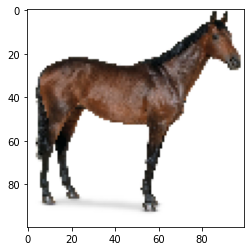

In [16]:
img = image.load_img('img.jpg',target_size=(100,100))
img = image.img_to_array(img)
plt.imshow(img.astype('int32'))
plt.show()

In [17]:
model2.predict(img.reshape(1,100,100,3))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.52838117, 0.03866125, 0.43295756]], dtype=float32)

In [18]:
cnames

['dogs', 'horses', 'Humans']